# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
%matplotlib inline

In [ ]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)

In [11]:
# Path to the transcript JSON file
file_path = 'data/transcript.json'  # Replace with the correct path

# Initialize an empty list to store valid JSON lines and a counter for skipped lines
data = []
skipped_lines = 0

# Read and parse the JSON file
with open(file_path, 'r') as file:
    for line in file:
        try:
            data.append(json.loads(line))  # Try to parse each line
        except json.JSONDecodeError:
            # Increment the skipped line counter
            skipped_lines += 1

# Normalize the nested structure
df = pd.json_normalize(data, sep='_')

# Standardize column names: transform all offer-related IDs to 'offer_id'
df.rename(columns={'value_offer id': 'offer_id', 'value_offer_id': 'offer_id', 'person': 'customer_id'}, inplace=True)

# Drop duplicate 'offer_id' columns if both exist
if 'offer_id' in df.columns and df.columns.tolist().count('offer_id') > 1:
    df = df.loc[:, ~df.columns.duplicated()]

# Clean up column names for consistency
df.columns = [col.replace('value_', '') for col in df.columns]

# Save to a CSV or view the DataFrame
df.to_csv('data/cleaned_transcript.csv', index=False)  # Save to a CSV file
print(df.head())  # Display the first few rows of the DataFrame

# Display the number of skipped lines
print(f"Number of skipped lines: {skipped_lines}")





                        customer_id           event  time  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0   
2  e2127556f4f64592b11af22de27a7932  offer received     0   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0   
4  68617ca6246f4fbc85e91a2a49552598  offer received     0   

                           offer_id  amount  reward  
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     NaN  
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN     NaN  
2  2906b810c7d4411798c6938adc9daaa5     NaN     NaN  
3  fafdcd668e3743c1bb461111dcafc2a4     NaN     NaN  
4  4d5c57ea9a6940dd891ad53e9dbe8da0     NaN     NaN  
Number of skipped lines: 114


In [13]:
transcript = pd.read_csv('data/cleaned_transcript.csv')

In [5]:
print("Portfolio Data: \n", portfolio.columns.to_list())
print("\nProfile Data: \n", profile.columns.to_list())
print("\nTranscript Data: \n", transcript.columns.to_list())

Portfolio Data: 
 ['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'offer_id']

Profile Data: 
 ['gender', 'age', 'customer_id', 'became_member_on', 'income']

Transcript Data: 
 ['person', 'event', 'time', 'offer_id', 'amount', 'reward']


In [17]:
# Data cleaning

# ---- Portfolio Data ---- #
# Renaming columns for better readability
portfolio.rename(columns={'id': 'offer_id'}, inplace=True)

# ---- Profile Data ---- #
# Handling Age anomalies - filtering out unrealistic ages (e.g., 118)
profile = profile[profile['age'] < 100]

# Convert 'became_member_on' to datetime for easier manipulation
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

# Renaming columns for better readability
profile.rename(columns={'id': 'customer_id'}, inplace=True)


# Saving cleaned datasets (optional, can be used later)
portfolio.to_csv('data/cleaned_portfolio.csv', index=False)
profile.to_csv('data/cleaned_profile.csv', index=False)


# Summary of data shapes after cleaning
print("\nData Shapes after cleaning:")
print("Portfolio:", portfolio.shape)
print("Profile:", profile.shape)
print("Transcript:", transcript.shape)



Data Shapes after cleaning:
Portfolio: (10, 6)
Profile: (14808, 5)
Transcript: (306534, 6)


In [20]:
# ---- Merging DataFrames ---- #
# Rename 'offer_id_portfolio' to 'offer_id' in portfolio for consistency
portfolio.rename(columns={'offer_id_portfolio': 'offer_id'}, inplace=True)

# Check if 'offer_id' exists in both transcript and portfolio before merging
print("\nTranscript Columns: ", transcript.columns)
print("Portfolio Columns: ", portfolio.columns)

# Merge transcript with profile using 'customer_id'
merged_df = transcript.merge(profile, on='customer_id', how='left')

# Check if 'offer_id' exists before attempting the merge
if 'offer_id' in merged_df.columns and 'offer_id' in portfolio.columns:
    # Merge the resulting dataset with portfolio using 'offer_id'
    merged_df = merged_df.merge(portfolio, on='offer_id', how='left')
else:
    print("Error: 'offer_id' is missing from one of the DataFrames. Cannot proceed with merging.")

# Display merged data sample if merge is successful
if 'offer_id' in merged_df.columns:
    print("\nMerged Data: \n", merged_df.head())

merged_df.to_csv('data/merged_data.csv', index=False)






Transcript Columns:  Index(['customer_id', 'event', 'time', 'offer_id', 'amount', 'reward'], dtype='object')
Portfolio Columns:  Index(['reward', 'channels', 'difficulty', 'duration', 'offer_type',
       'offer_id'],
      dtype='object')

Merged Data: 
                         customer_id           event  time  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0   
2  e2127556f4f64592b11af22de27a7932  offer received     0   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0   
4  68617ca6246f4fbc85e91a2a49552598  offer received     0   

                           offer_id  amount  reward_x gender   age  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN       NaN      F  75.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     NaN       NaN    NaN   NaN   
2  2906b810c7d4411798c6938adc9daaa5     NaN       NaN      M  68.0   
3  fafdcd668e3743c1bb461111dcafc2a4     NaN       NaN    NaN   NaN   
4  4d5c57ea9a6940dd891ad53


Merged Data with Engineered Features: 
                         customer_id           event  time  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received     0   
1  a03223e636434f42ac4c3df47e8bac43  offer received     0   
2  e2127556f4f64592b11af22de27a7932  offer received     0   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received     0   
4  68617ca6246f4fbc85e91a2a49552598  offer received     0   

                           offer_id  amount  reward_x gender   age  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     0.0       NaN      F  75.0   
1  0b1e1539f2cc45b7b9fa7c272da2e1d7     0.0       NaN    NaN   NaN   
2  2906b810c7d4411798c6938adc9daaa5     0.0       NaN      M  68.0   
3  fafdcd668e3743c1bb461111dcafc2a4     0.0       NaN    NaN   NaN   
4  4d5c57ea9a6940dd891ad53e9dbe8da0     0.0       NaN    NaN   NaN   

  became_member_on    income  reward_y                      channels  \
0       2017-05-09  100000.0       5.0          [web, email, mobile]   
1              NaT       Na

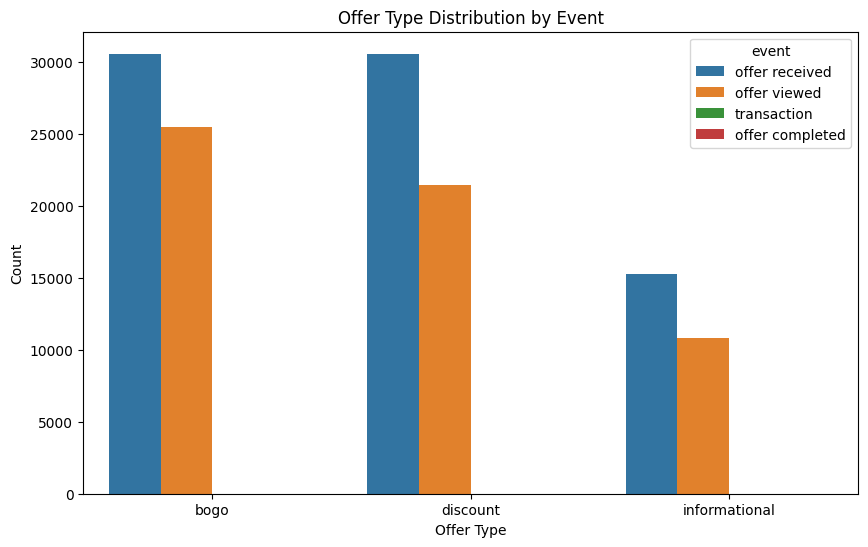

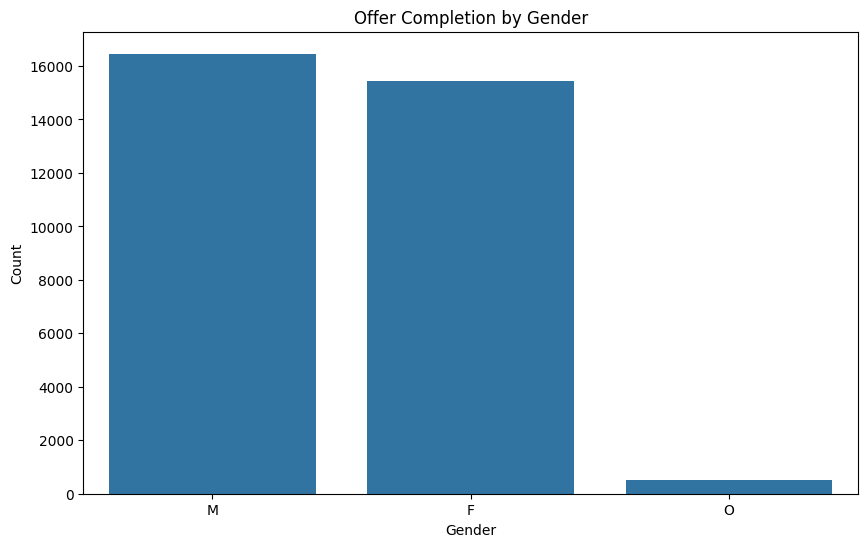

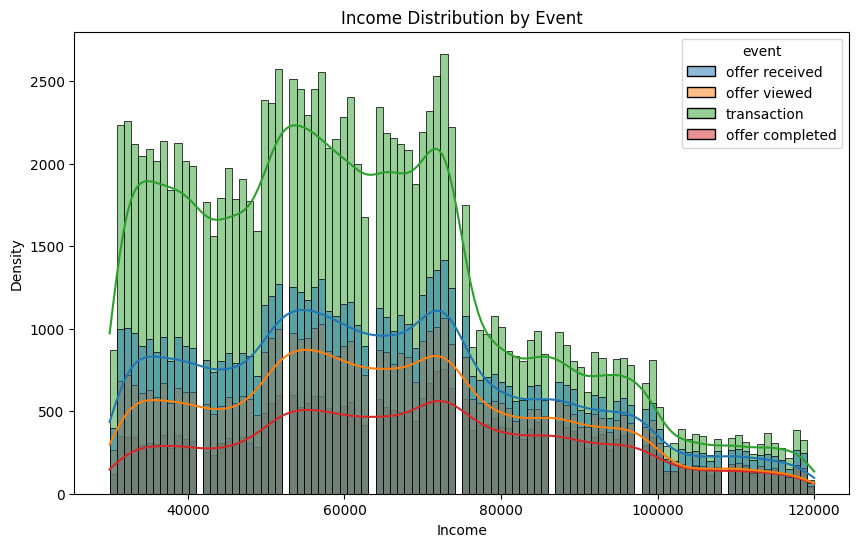


Merged Data Shape: (306534, 20)


In [22]:
# ---- Feature Engineering ---- #
# Proceed with feature engineering only if the merge was successful
if 'offer_id' in merged_df.columns:
    # Create a new feature to indicate whether the offer was viewed before being completed
    merged_df['offer_viewed'] = np.where((merged_df['event'] == 'offer viewed'), 1, 0)
    merged_df['offer_completed'] = np.where((merged_df['event'] == 'offer completed'), 1, 0)

    # Create new features to calculate the time between receiving and viewing/completing the offer
    merged_df['time_to_view'] = merged_df.groupby(['customer_id', 'offer_id'])['time'].diff().where(merged_df['event'] == 'offer viewed')
    merged_df['time_to_complete'] = merged_df.groupby(['customer_id', 'offer_id'])['time'].diff().where(merged_df['event'] == 'offer completed')

    # Create a feature indicating total spend during an offer period
    merged_df['amount'] = merged_df['amount'].fillna(0)
    merged_df['total_spend_during_offer'] = merged_df.groupby(['customer_id', 'offer_id'])['amount'].transform('sum')

    # Display engineered features
    print("\nMerged Data with Engineered Features: \n", merged_df.head())

    # ---- Exploratory Data Analysis (EDA) ---- #
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Offer Type Analysis
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_df, x='offer_type', hue='event')
    plt.title('Offer Type Distribution by Event')
    plt.xlabel('Offer Type')
    plt.ylabel('Count')
    plt.show()

    # Gender Analysis on Offer Completion
    plt.figure(figsize=(10, 6))
    sns.countplot(data=merged_df[merged_df['event'] == 'offer completed'], x='gender')
    plt.title('Offer Completion by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    plt.show()

    # Income Analysis
    plt.figure(figsize=(10, 6))
    sns.histplot(data=merged_df, x='income', hue='event', kde=True)
    plt.title('Income Distribution by Event')
    plt.xlabel('Income')
    plt.ylabel('Density')
    plt.show()

    # Saving merged dataset with engineered features
    merged_df.to_csv('data/merged_dataset_features.csv', index=False)

    # Summary of merged data shape
    print("\nMerged Data Shape:", merged_df.shape)

Unique values in 'event' column: ['offer received' 'offer viewed' 'transaction' 'offer completed']


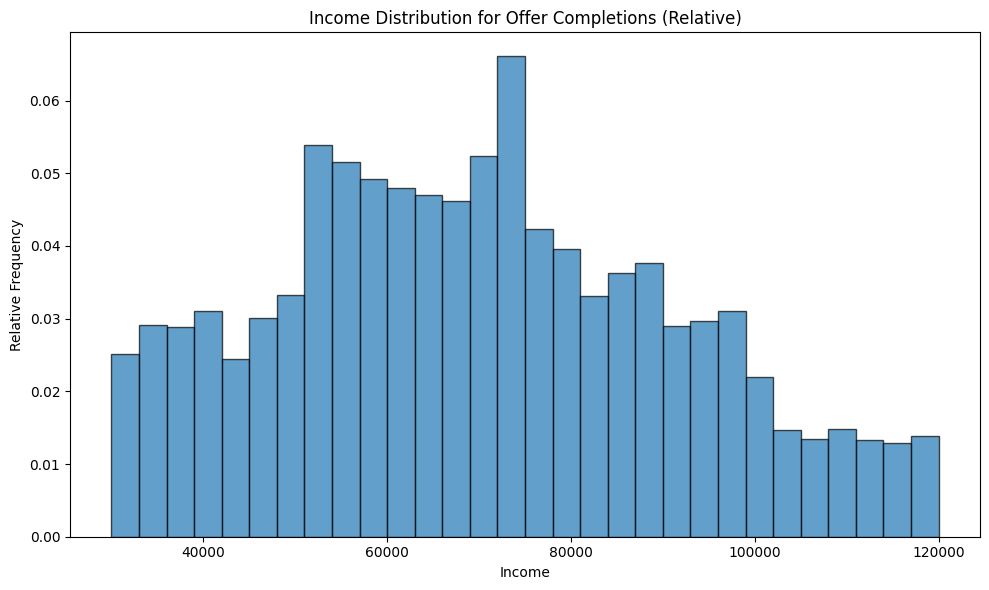

In [57]:
# Filter data for completed offers with non-null income
completed_offers = merged_df[(merged_df['event'] == 'offer completed') & (merged_df['income'].notnull())]

# Plot the income distribution with relative frequencies
plt.figure(figsize=(10, 6))
plt.hist(
    completed_offers['income'], 
    bins=30, 
    weights=[1/len(completed_offers)] * len(completed_offers), 
    edgecolor='black', 
    alpha=0.7
)
plt.title('Income Distribution for Offer Completions (Relative)')
plt.xlabel('Income')
plt.ylabel('Relative Frequency')
plt.tight_layout()
plt.show()

/var/folders/mv/p9mr7xh16q98xgxnzr9h0b6h0000gn/T/ipykernel_13483/2157754166.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  behavior_analysis = merged_df.groupby('membership_category').agg({


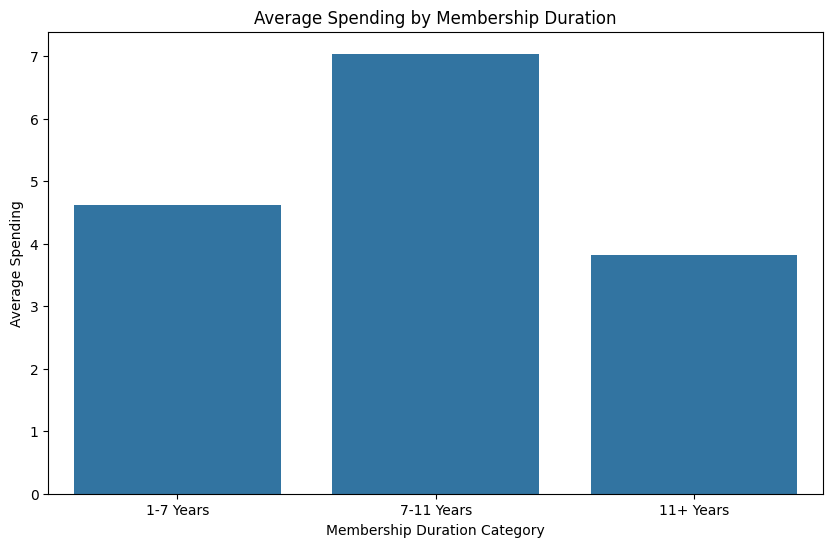

/var/folders/mv/p9mr7xh16q98xgxnzr9h0b6h0000gn/T/ipykernel_13483/2157754166.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_data = merged_df.groupby(['membership_category', 'event']).size().reset_index(name='count')


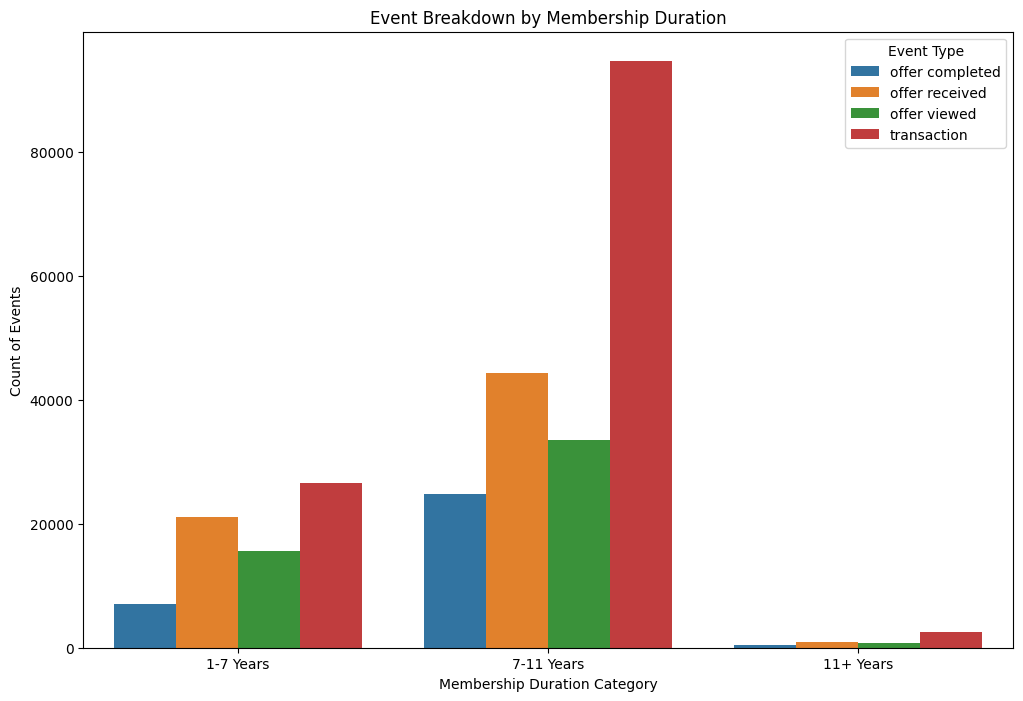

/var/folders/mv/p9mr7xh16q98xgxnzr9h0b6h0000gn/T/ipykernel_13483/2157754166.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  offer_data = merged_df.groupby(['membership_category', 'offer_type']).size().reset_index(name='count')


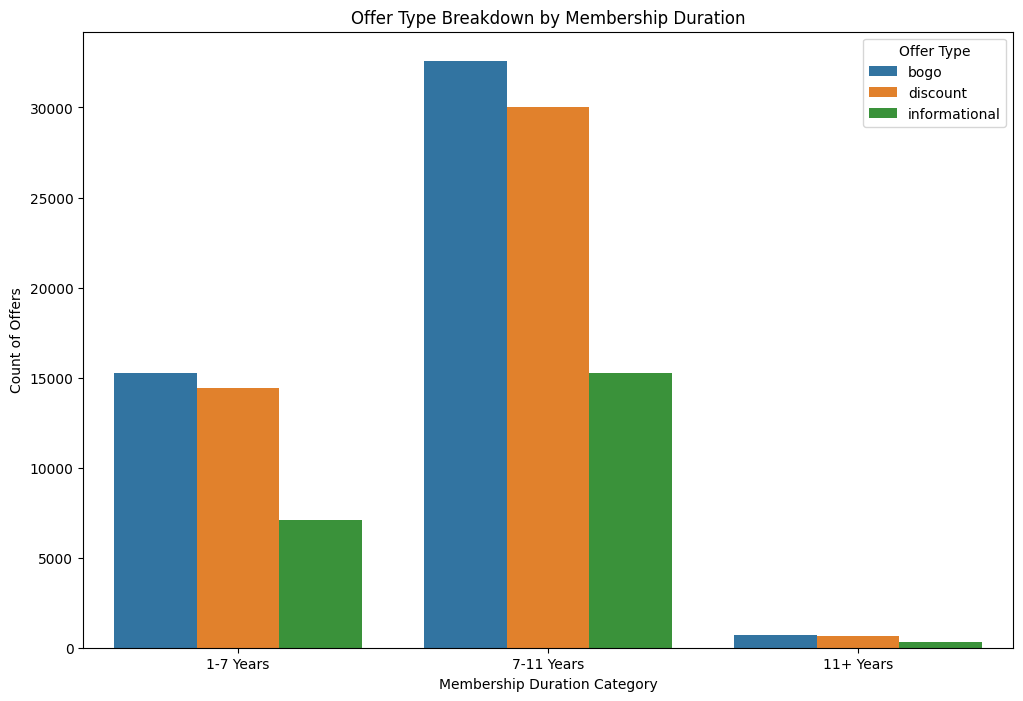

In [76]:
# Question 2: How Does Membership Duration Affect Customer Behavior?
# Calculate membership duration for each customer

# Convert `became_member_on` to datetime and calculate membership duration
merged_df['became_member_on'] = pd.to_datetime(merged_df['became_member_on'], errors='coerce')
merged_df['membership_duration_days'] = (datetime.now() - merged_df['became_member_on']).dt.days

# Analyze customer behavior based on membership duration
# 1. Grouping by membership duration buckets (e.g., <1 year, 1-3 years, >3 years)
merged_df['membership_duration_years'] = merged_df['membership_duration_days'] / 365
merged_df['membership_category'] = pd.cut(
    merged_df['membership_duration_years'],
    bins=[1, 7, 11, 100],
    labels=['1-7 Years', '7-11 Years', '11+ Years']
)

# 2. Aggregating customer behaviors
behavior_analysis = merged_df.groupby('membership_category').agg({
    'amount': ['mean', 'sum'], # Spending behavior
    'event': lambda x: x.value_counts().to_dict(), # Event breakdown
    'offer_type': lambda x: x.value_counts().to_dict() # Offer type breakdown
}).reset_index()

# Display the analysis results

# Plotting Average Spending by Membership Category
plt.figure(figsize=(10, 6))
sns.barplot(
    x='membership_category',
    y=('amount', 'mean'), # Accessing the mean spending column
    data=behavior_analysis
)
plt.title('Average Spending by Membership Duration')
plt.xlabel('Membership Duration Category')
plt.ylabel('Average Spending')
plt.show()

# Event Type Breakdown by Membership Duration
event_data = merged_df.groupby(['membership_category', 'event']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(
    x='membership_category',
    y='count',
    hue='event',
    data=event_data
)
plt.title('Event Breakdown by Membership Duration')
plt.xlabel('Membership Duration Category')
plt.ylabel('Count of Events')
plt.legend(title='Event Type')
plt.show()

# Offer Type Breakdown by Membership Duration
offer_data = merged_df.groupby(['membership_category', 'offer_type']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(
    x='membership_category',
    y='count',
    hue='offer_type',
    data=offer_data
)
plt.title('Offer Type Breakdown by Membership Duration')
plt.xlabel('Membership Duration Category')
plt.ylabel('Count of Offers')
plt.legend(title='Offer Type')
plt.show()
